# Análisis Exploratorio de Datos (Exploratory Data Analysis - EDA)

## Introducción

En esta sección, realizaremos un Análisis Exploratorio de Datos (EDA) sobre un conjunto de datos relacionado con tiempos de carguío y acarreo en minería. El objetivo del EDA es comprender las características fundamentales del dataset, identificar patrones y anomalías, y preparar los datos para un análisis posterior o modelado. El EDA se divide en tres pasos principales:

1. **Descripción del Dataset**: Exploración inicial de las variables disponibles, sus tipos, y una visión general de los datos.
2. **Visualización de Datos**: Uso de gráficos para identificar tendencias y patrones.
3. **Identificación de Valores Nulos, Outliers, y Patrones Iniciales**: Detección de datos faltantes, valores extremos y posibles correlaciones.

### Cargando el Dataset

Primero, vamos a cargar el dataset y hacer una inspección inicial para entender su estructura.

In [4]:
import pandas as pd

# Cargar el dataset
file_path = 'data_clase.csv'
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()

,id,Turno Carga,equipo_acarreo,operador_acarreo,material,flota_carguio,equipo_carguio,duracion_llegada,duracion_acarreo,duracion_descarga,duracion_viajando_vacio,tonelaje,efh_cargado_km,efh_vacio_km,distancia_cargado_km,distancia_vacia_km,velocidad_cargado,velocidad_vacio
0,1104116,A,Equipo_acarreo 1,Operador 1,Mineral Sulfuro,Flota_carguio 1,Equipo_carguio 1,271,120,48,124.2,305.0,1.00,1.24,0.66,0.61,20.22,18.24
1,1104117,A,Equipo_acarreo 2,Operador 2,Mineral Óxido,Flota_carguio 2,Equipo_carguio 2,158,338,50,271.8,275.0,2.82,2.72,2.23,2.30,23.71,26.32
2,1104118,A,Equipo_acarreo 3,Operador 3,Mineral Sulfuro,Flota_carguio 2,Equipo_carguio 3,530,982,34,568.2,279.0,8.18,5.68,4.07,4.37,14.67,32.39
3,1104119,A,Equipo_acarreo 4,Operador 4,Desmonte,Flota_carguio 1,Equipo_carguio 4,6,216,50,448.2,273.0,1.80,4.48,1.28,3.28,20.51,25.73
4,1104120,A,Equipo_acarreo 5,Operador 5,Mineral Óxido,Flota_carguio 2,Equipo_carguio 2,4,340,34,394.8,298.0,2.83,3.95,2.25,2.30,23.95,29.35


### 1. Descripción del Dataset

En este paso, describiremos las características principales del dataset, incluyendo la cantidad de filas y columnas, los tipos de datos y un resumen estadístico de las variables numéricas.

In [5]:
# Dimensiones del dataset
print(f"El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)



El dataset tiene 38376 filas y 18 columnas.

Tipos de datos:
id                           int64
Turno Carga                 object
equipo_acarreo              object
operador_acarreo            object
material                    object
flota_carguio               object
equipo_carguio              object
duracion_llegada             int64
duracion_acarreo             int64
duracion_descarga            int64
duracion_viajando_vacio    float64
tonelaje                   float64
efh_cargado_km             float64
efh_vacio_km               float64
distancia_cargado_km       float64
distancia_vacia_km         float64
velocidad_cargado          float64
velocidad_vacio            float64
dtype: object


In [6]:
# Resumen estadístico de las variables numéricas
print("\nResumen estadístico de las variables numéricas:")
df.describe()



Resumen estadístico de las variables numéricas:


,id,duracion_llegada,duracion_acarreo,duracion_descarga,duracion_viajando_vacio,tonelaje,efh_cargado_km,efh_vacio_km,distancia_cargado_km,distancia_vacia_km,velocidad_cargado,velocidad_vacio
count,3.837600e+04,38376.000000,38376.000000,38376.000000,38376.000000,38368.000000,38376.000000,38376.000000,37922.000000,38317.000000,38355.000000,38346.000000
mean,1.123516e+06,130.275928,546.203773,43.354466,429.293981,283.410915,4.504583,4.292954,2.692938,2.778070,20.544402,28.948719
std,1.120243e+04,229.935693,317.252999,25.359108,276.298850,17.489781,2.491470,2.762993,1.093116,1.140871,6.039618,4.874316
min,1.104116e+06,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.113822e+06,6.000000,242.000000,36.000000,235.800000,278.000000,2.020000,2.360000,1.690000,1.720000,15.720000,26.280000
50%,1.123516e+06,30.000000,516.000000,40.000000,388.200000,284.000000,4.200000,3.880000,3.080000,3.120000,18.470000,29.290000
75%,1.133220e+06,171.000000,796.000000,46.000000,502.200000,291.000000,6.630000,5.020000,3.540000,3.580000,25.240000,32.150000
max,1.142951e+06,3540.000000,3480.000000,2520.000000,4791.000000,344.000000,27.910000,47.910000,41.150000,10.500000,41.620000,44.850000


In [7]:
# Resumen de las variables categóricas
print("\nVariables categóricas:")
df.describe(include=['object'])


Variables categóricas:


,Turno Carga,equipo_acarreo,operador_acarreo,material,flota_carguio,equipo_carguio
count,38376,38376,38376,38376,38376,38376
unique,2,27,136,3,3,7
top,B,Equipo_acarreo 22,Operador 3,Desmonte,Flota_carguio 2,Equipo_carguio 3
freq,19322,1617,549,23926,26281,9357


**Explicación**:
- Se inspecciona la cantidad de filas y columnas para entender el tamaño del dataset.
- Se identifican los tipos de datos para diferenciar entre variables categóricas y numéricas.
- Se provee un resumen estadístico de las variables numéricas, que incluye medidas como la media, la desviación estándar, los valores mínimos y máximos, etc.
- Se proporciona un resumen de las variables categóricas, mostrando la cantidad de valores únicos, el valor más frecuente, etc.

### 2. Visualización de Datos

La visualización es clave para identificar patrones y tendencias. Vamos a generar diferentes gráficos para las variables numéricas y categóricas.

#### 2.1 Histograma para Variables Numéricas

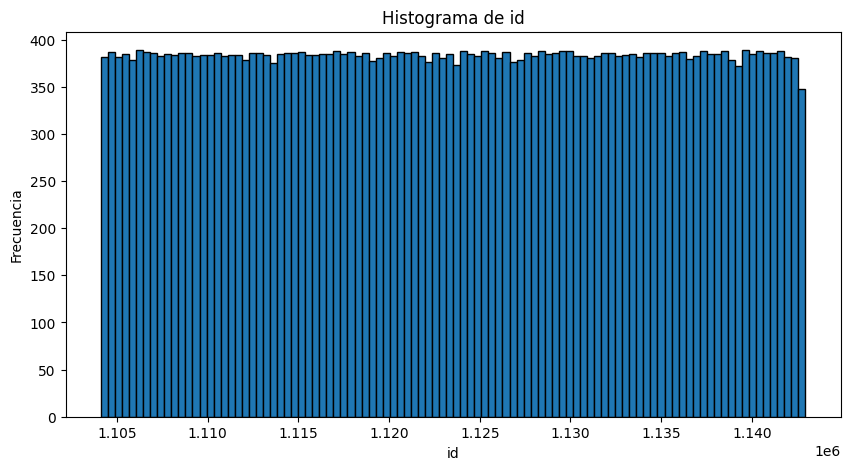

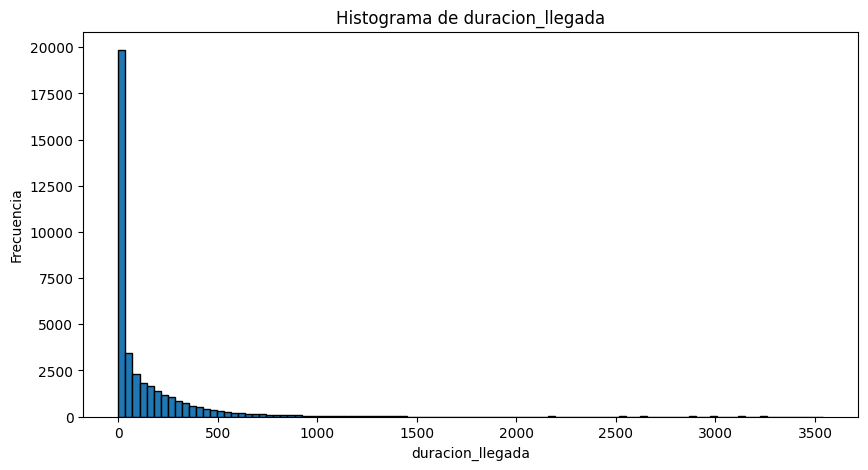

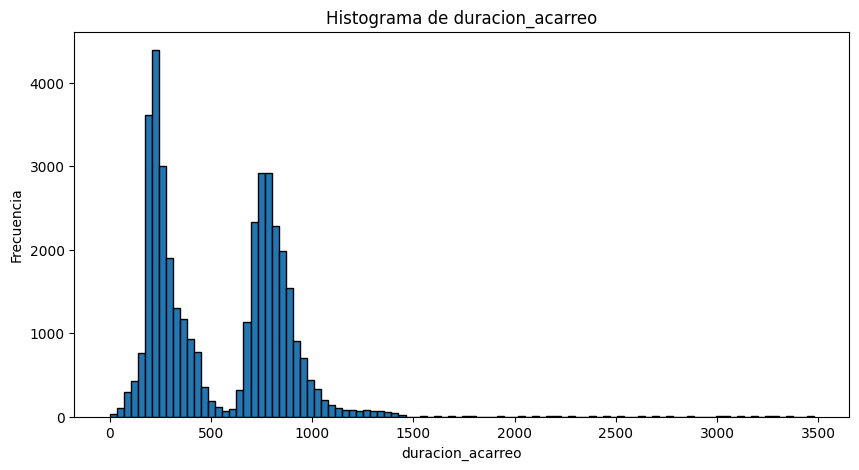

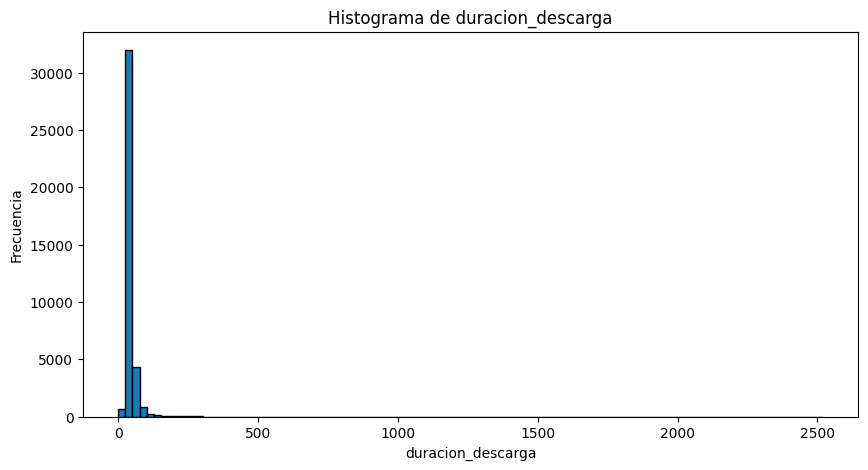

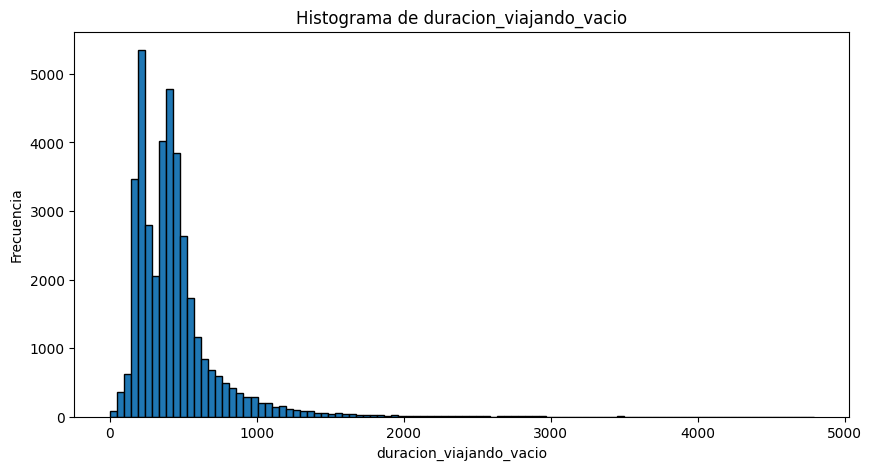

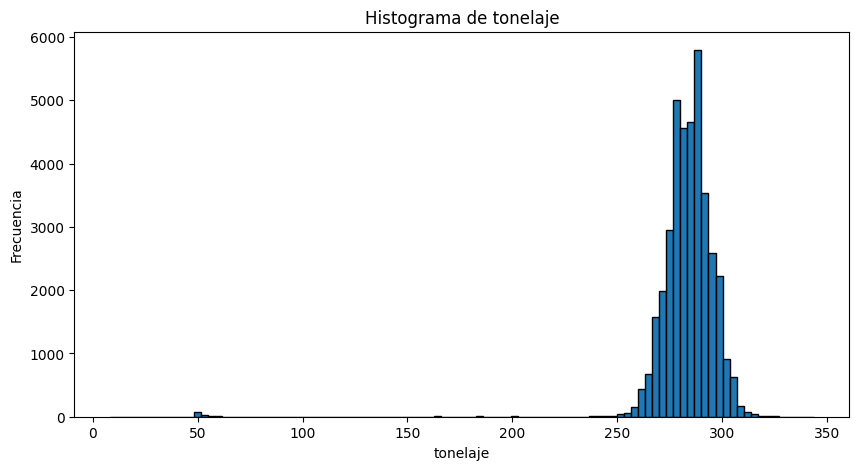

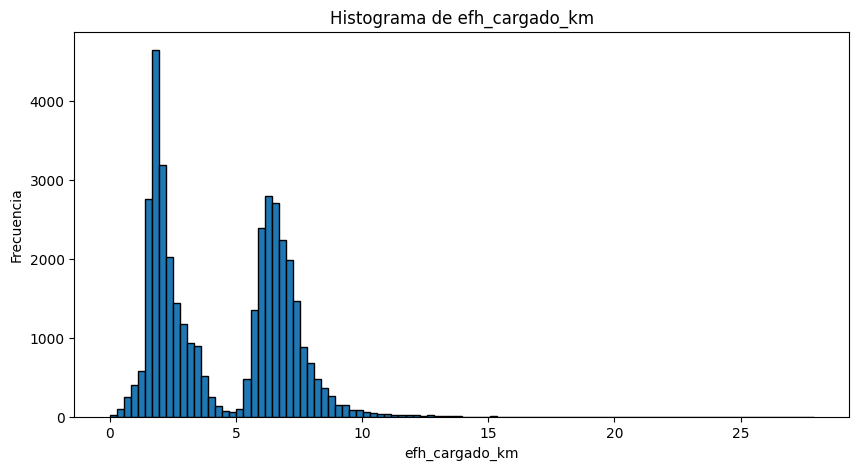

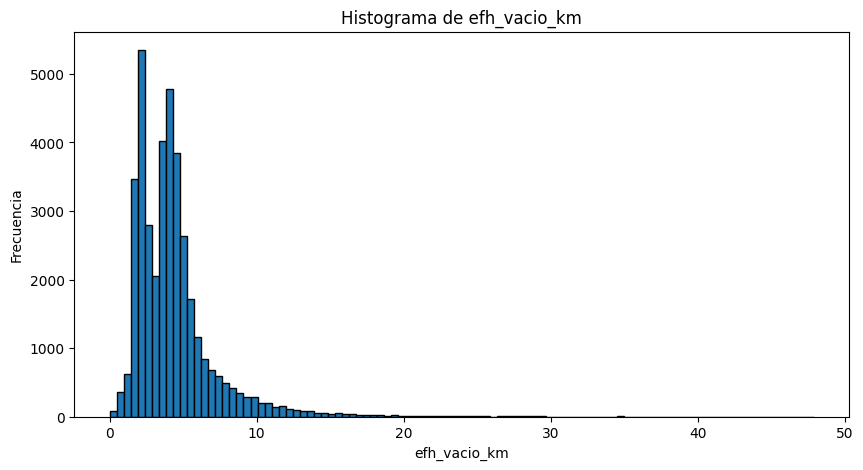

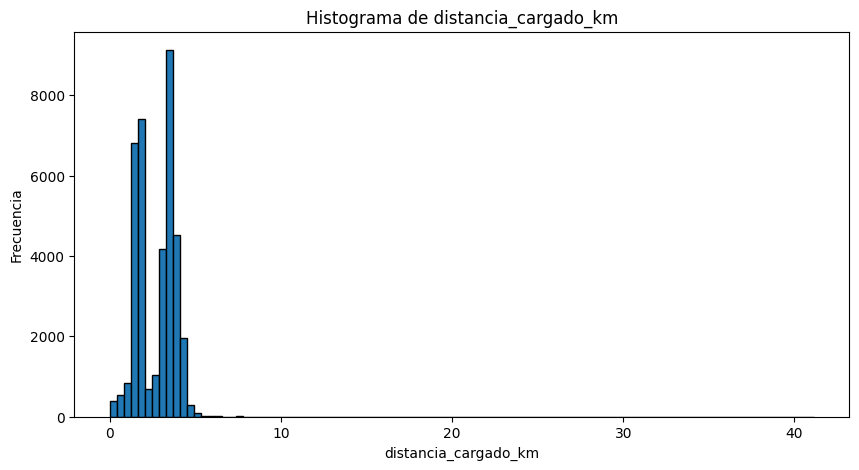

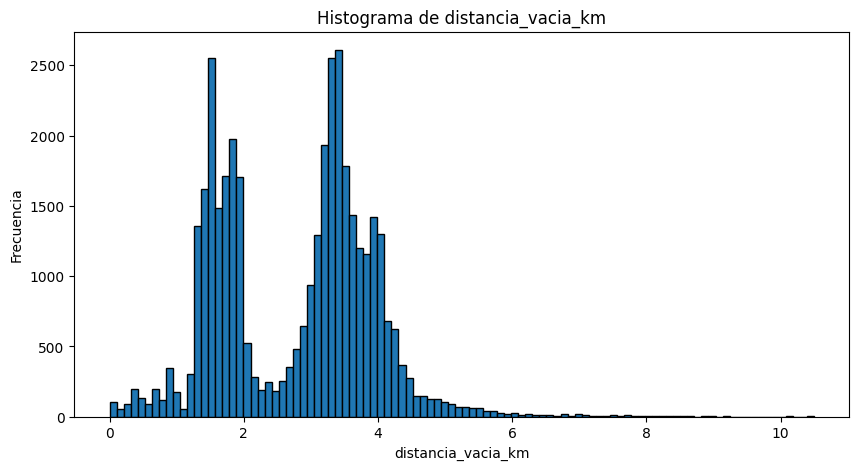

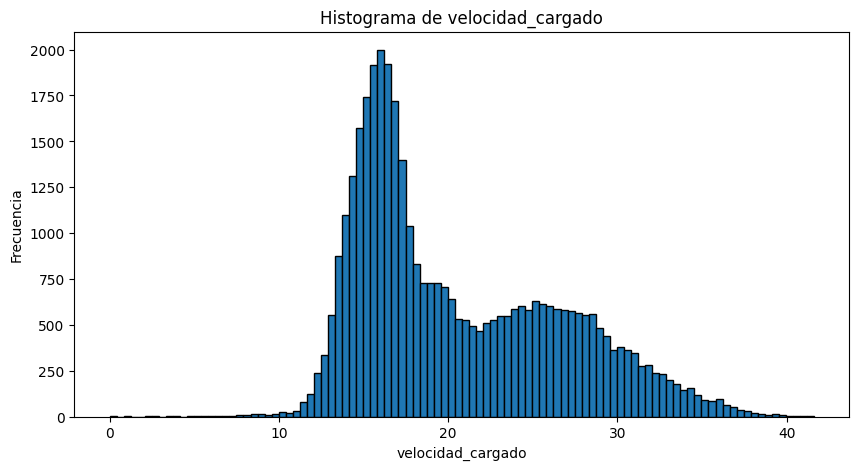

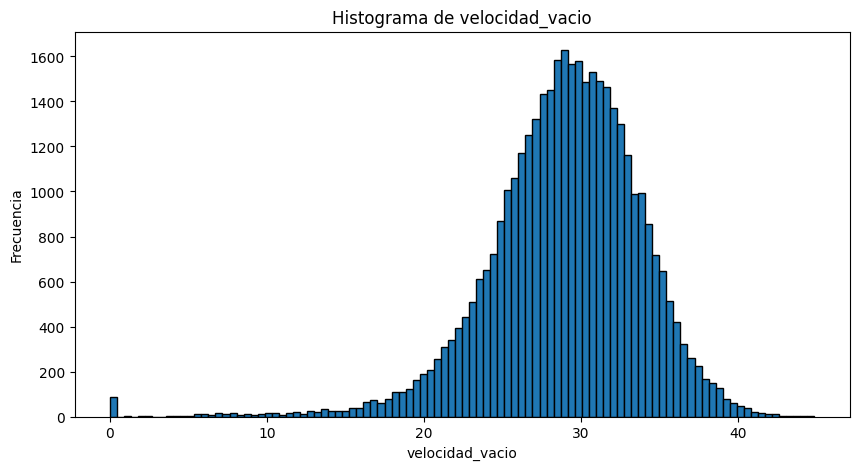

In [10]:
import matplotlib.pyplot as plt

# Selección de variables numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creación de histogramas
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    df[column].hist(bins=100, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(False)
    plt.show()

**Explicación**:
- Se seleccionan las variables numéricas y se generan histogramas para visualizar la distribución de cada variable.
- Los histogramas ayudan a identificar distribuciones normales, sesgos, y la presencia de outliers.

#### 2.2 Gráfico de Barras para Variables Categóricas

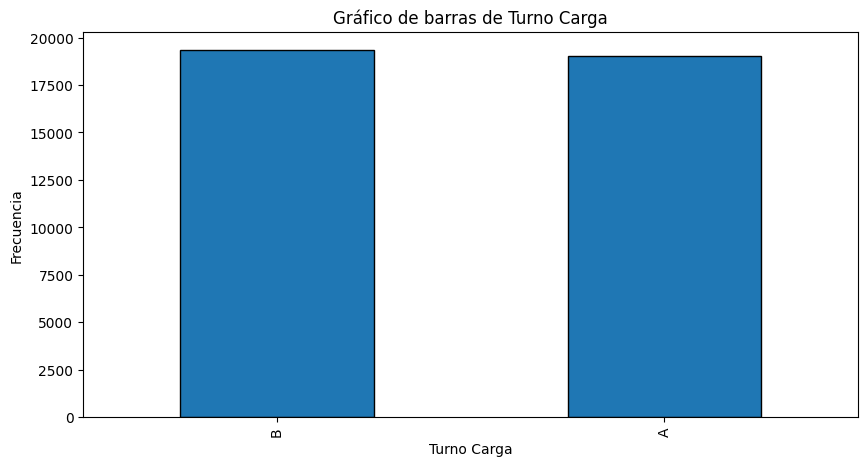

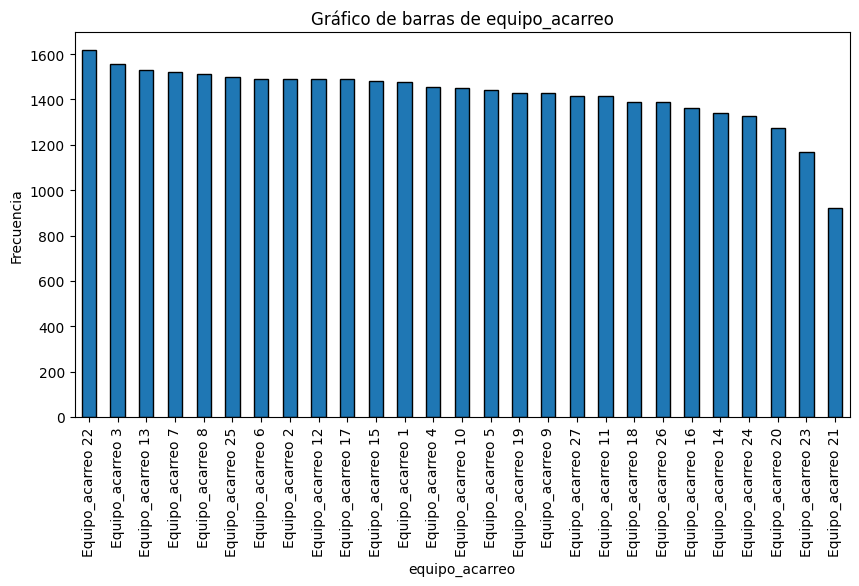

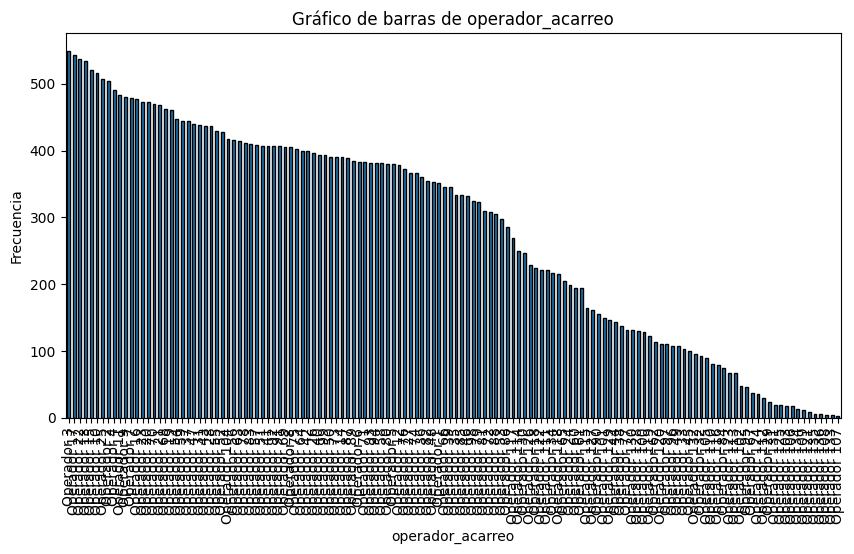

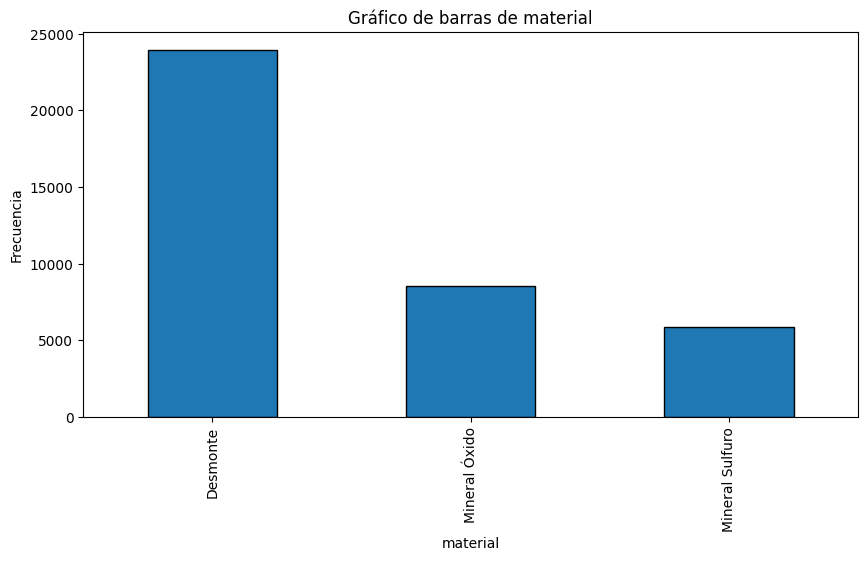

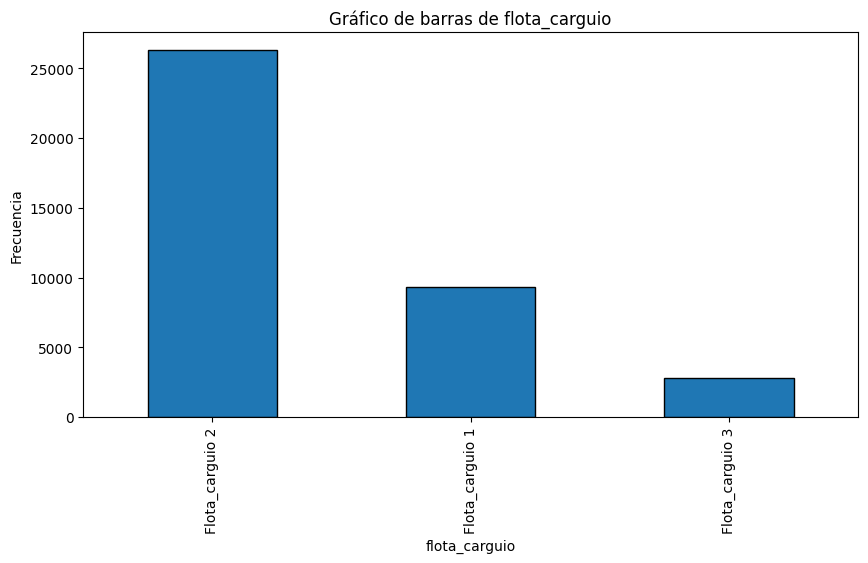

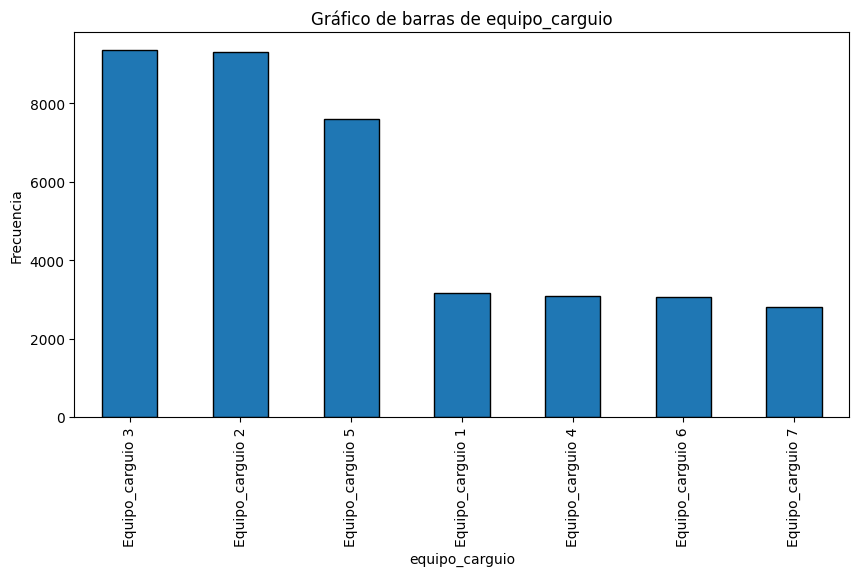

In [11]:
# Selección de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Creación de gráficos de barras
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    df[column].value_counts().plot(kind='bar', edgecolor='black')
    plt.title(f'Gráfico de barras de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.grid(False)
    plt.show()

**Explicación**:
- Se seleccionan las variables categóricas y se generan gráficos de barras que muestran la frecuencia de cada categoría.
- Los gráficos de barras permiten observar la distribución de categorías y detectar desequilibrios en los datos.

### 3. Identificación de Valores Nulos, Outliers, y Patrones Iniciales

En este paso, identificaremos datos faltantes, outliers y posibles correlaciones entre variables.

#### 3.1 Detección de Valores Nulos

In [12]:
# Conteo de valores nulos por columna
nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(nulos[nulos > 0])

Valores nulos por columna:
tonelaje                  8
distancia_cargado_km    454
distancia_vacia_km       59
velocidad_cargado        21
velocidad_vacio          30
dtype: int64



**Explicación**:
- Se identifican columnas con valores nulos y se proporciona el conteo de estos valores, lo cual es crucial para el manejo de datos incompletos.

#### 3.2 Detección de Outliers

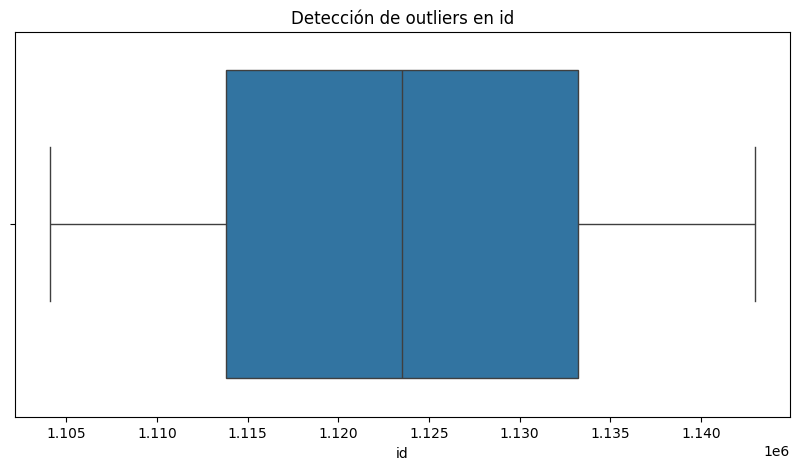

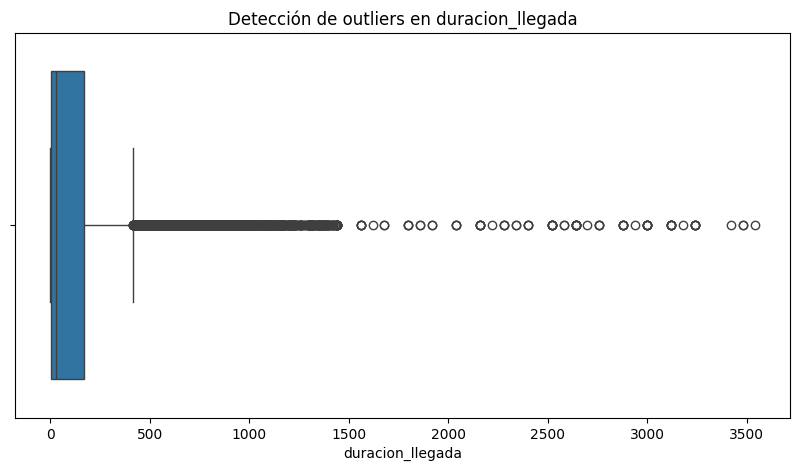

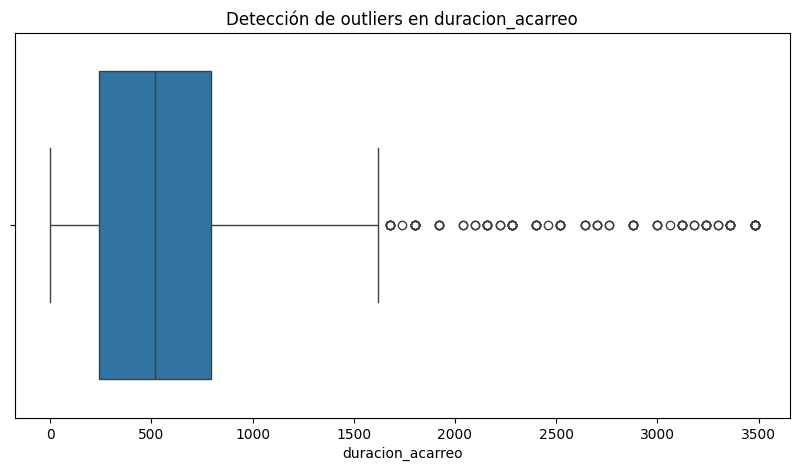

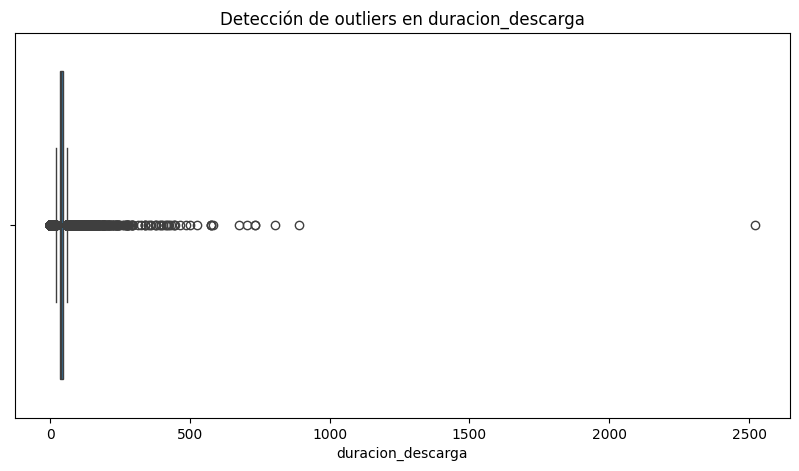

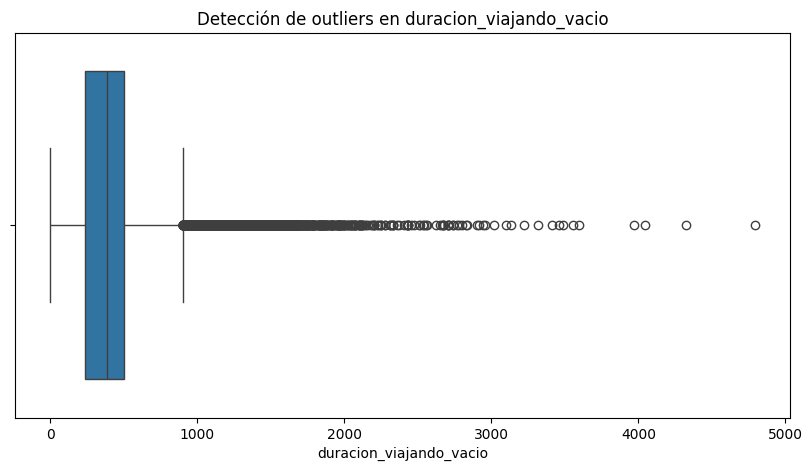

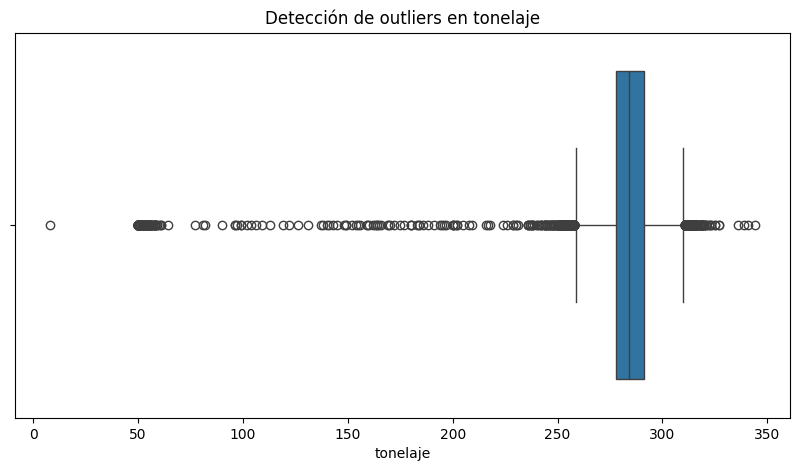

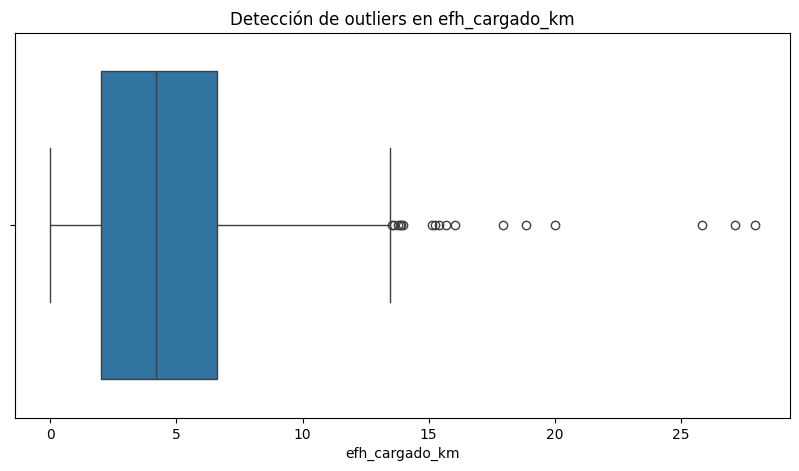

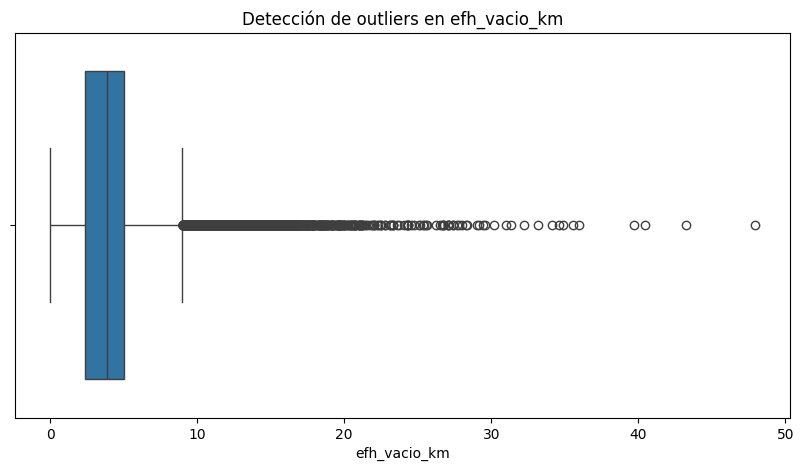

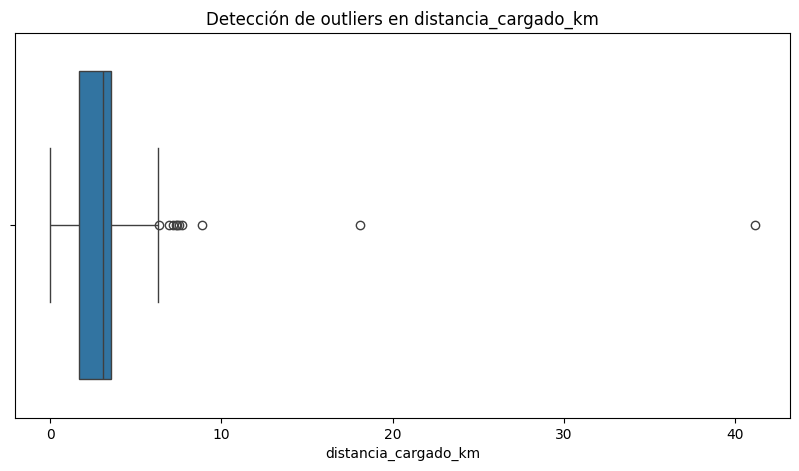

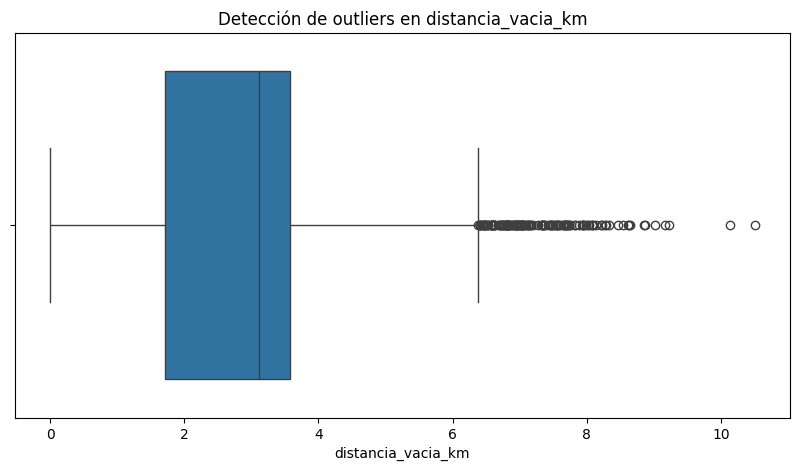

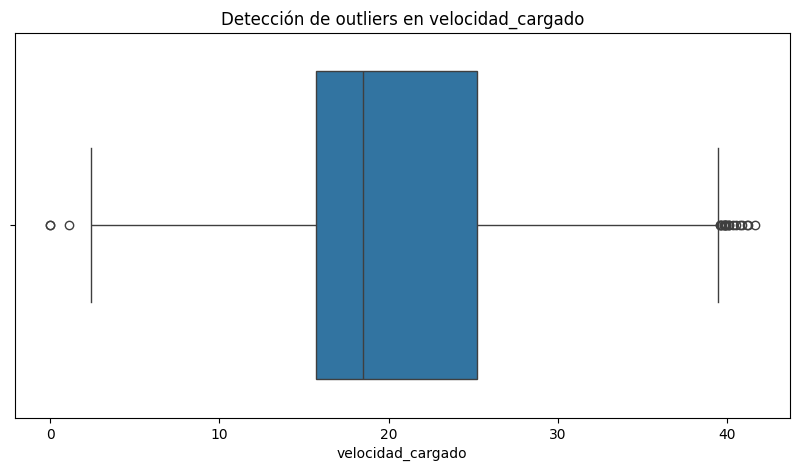

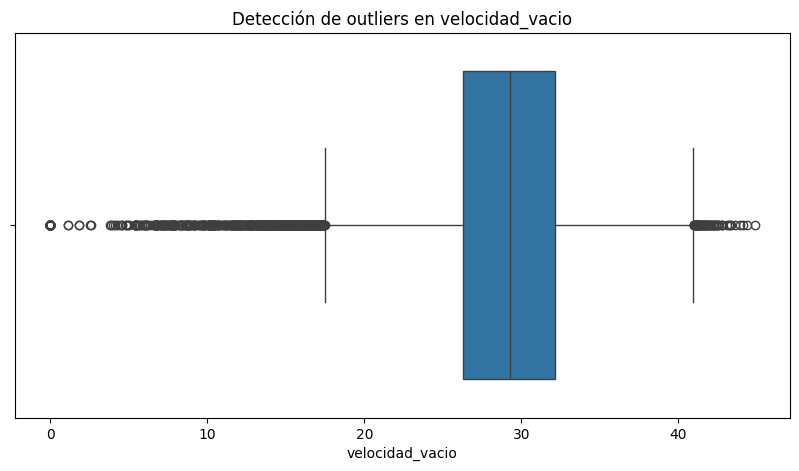

In [14]:
import seaborn as sns

# Creación de boxplots para detección de outliers
for column in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column])
    plt.title(f'Detección de outliers en {column}')
    plt.show()

**Explicación**:
- Se utilizan boxplots para identificar outliers en las variables numéricas. Los outliers pueden influir significativamente en los análisis y deben manejarse adecuadamente.

#### 3.3 Análisis de Correlaciones

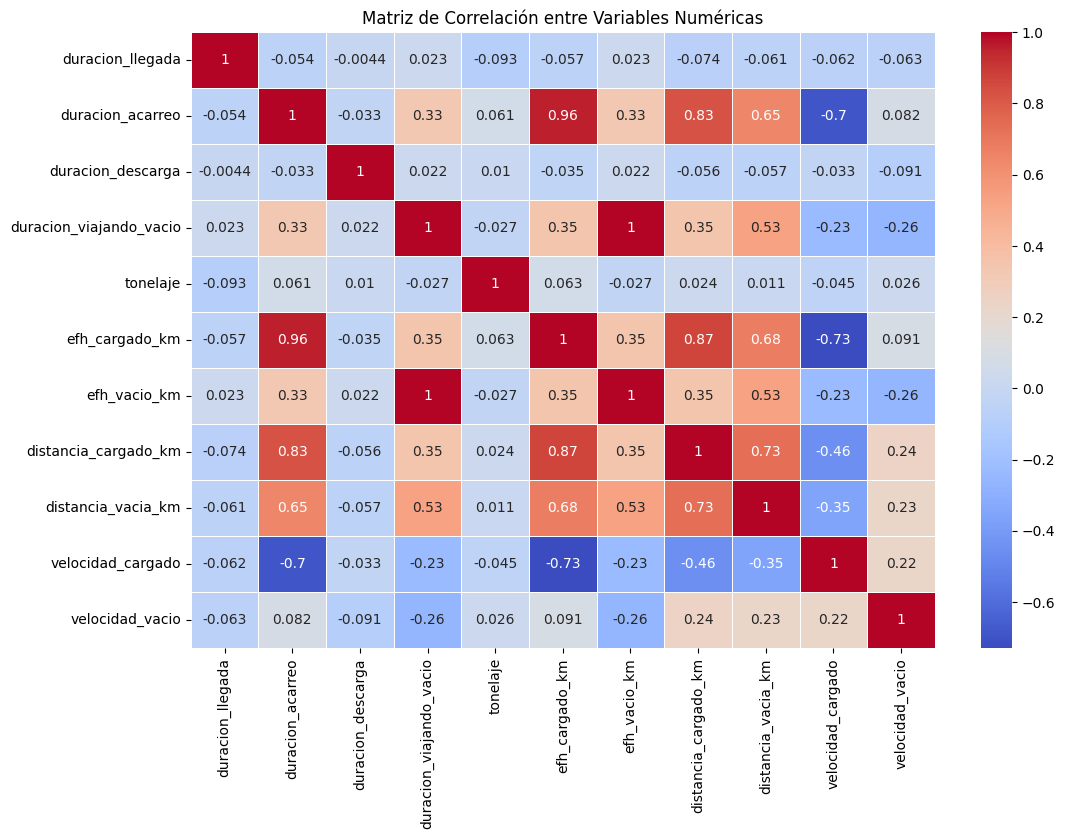

In [15]:
# Matriz de correlación
plt.figure(figsize=(12, 8))
correlation_matrix = df[['duracion_llegada',
       'duracion_acarreo', 'duracion_descarga', 'duracion_viajando_vacio',
       'tonelaje', 'efh_cargado_km', 'efh_vacio_km', 'distancia_cargado_km',
       'distancia_vacia_km', 'velocidad_cargado', 'velocidad_vacio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

**Explicación**:
- Se genera una matriz de correlación que muestra la relación entre las variables numéricas. Esto ayuda a identificar variables que pueden estar altamente correlacionadas.

In [ ]:
# # Transformar variables categóricas a numéricas usando One-Hot Encoding
# df_encoded = pd.get_dummies(df, drop_first=True)

# # Verificar que todas las columnas ahora son numéricas
# print("Tipos de datos después del One-Hot Encoding:")
# print(df_encoded.dtypes)

# # Matriz de correlación
# plt.figure(figsize=(12, 8))
# correlation_matrix = df_encoded.corr()
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Matriz de Correlación entre Variables Numéricas y Codificadas')
# plt.show()
